<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#STEP1-Check-Data" data-toc-modified-id="STEP1-Check-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>STEP1 Check Data</a></span><ul class="toc-item"><li><span><a href="#1.Check-the-data,--understand-the-data-structure-and-how-the-busniess-is-conducted." data-toc-modified-id="1.Check-the-data,--understand-the-data-structure-and-how-the-busniess-is-conducted.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>1.Check the data,  understand the data structure and how the busniess is conducted.</a></span></li><li><span><a href="#2.--Check-if-NA/mixed-assignment/multiple-device-is-random" data-toc-modified-id="2.--Check-if-NA/mixed-assignment/multiple-device-is-random-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>2.  Check if NA/mixed assignment/multiple device is random</a></span></li><li><span><a href="#3-some-countries-and-device-has-significant-restulst.-Need-to-dive-in." data-toc-modified-id="3-some-countries-and-device-has-significant-restulst.-Need-to-dive-in.-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>3 some countries and device has significant restulst. Need to dive in.</a></span></li></ul></li><li><span><a href="#4-blox-of-key-metrics,-views,-clicks,-ctr,-problem" data-toc-modified-id="4-blox-of-key-metrics,-views,-clicks,-ctr,-problem-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>4 blox of key metrics, views, clicks, ctr, problem</a></span></li><li><span><a href="#STEP-2--Before-Experiment." data-toc-modified-id="STEP-2--Before-Experiment.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>STEP 2  Before Experiment.</a></span><ul class="toc-item"><li><span><a href="#5.-Split-data-into-before-experiment-&amp;-after-experiment" data-toc-modified-id="5.-Split-data-into-before-experiment-&amp;-after-experiment-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>5. Split data into before experiment &amp; after experiment</a></span></li></ul></li><li><span><a href="#Step-3-Experiment" data-toc-modified-id="Step-3-Experiment-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Step 3 Experiment</a></span><ul class="toc-item"><li><span><a href="#1.-Check-if-the-CTR-is-significant-between-control-&amp;-treatment-groups.-What's-your-results?--What-do-you-think-?" data-toc-modified-id="1.-Check-if-the-CTR-is-significant-between-control-&amp;-treatment-groups.-What's-your-results?--What-do-you-think-?-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>1. Check if the CTR is significant between control &amp; treatment groups. What's your results?  What do you think ?</a></span></li><li><span><a href="#2.-Break-it-down-by-device-and-check-again.--What-is-your-finding?-What-should-you-do-at-this-point?" data-toc-modified-id="2.-Break-it-down-by-device-and-check-again.--What-is-your-finding?-What-should-you-do-at-this-point?-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>2. Break it down by device and check again.  What is your finding? What should you do at this point?</a></span></li><li><span><a href="#3.-Check-reveune" data-toc-modified-id="3.-Check-reveune-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>3. Check reveune</a></span></li><li><span><a href="#4-Cohort-analysis" data-toc-modified-id="4-Cohort-analysis-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>4 Cohort analysis</a></span></li></ul></li></ul></div>

This data shows user's activities on a online sales website.
An experiment was launched on day 4 with a goal to increase users' click through rate
(clicks/views) and total revenue.
Note: first 3 days no experiment, 4th-14th days experiment running
Analyze the data and write a report to answer the following questions:


1. Is the experiment correct? Please note any problems in your report.
2. Did the test version help increase CTR and total revenue? Help the team make
the right decisions.
3. There might be learning effect for users to get used to the change. Help the team
understand this.

In [3]:
import pandas as pd
%matplotlib inline

import numpy as np
import statsmodels.api as sm
from scipy import stats
from matplotlib import pyplot as plt
import datetime as dt
import statsmodels.stats.proportion  as ssp

In [5]:
data=pd.read_csv('abtest_example_ctr.csv')

In [6]:
from __future__ import print_function

## STEP1 Check Data

### 1.Check the data,  understand the data structure and how the busniess is conducted.

**1.0 Check the data shape, variable type and Output first five rows of the dataset and check them**

In [7]:
data.shape

(22960, 11)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22960 entries, 0 to 22959
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   userid    22685 non-null  float64
 1   country   22960 non-null  object 
 2   groups    22960 non-null  object 
 3   deviceid  22960 non-null  int64  
 4   device    22960 non-null  object 
 5   sellerid  22960 non-null  int64  
 6   itemid    22960 non-null  int64  
 7   date      22960 non-null  object 
 8   views     22960 non-null  int64  
 9   clicks    22960 non-null  int64  
 10  revenue   22960 non-null  float64
dtypes: float64(2), int64(5), object(4)
memory usage: 1.9+ MB


In [3]:
data.head()

,userid,country,groups,deviceid,device,sellerid,itemid,date,views,clicks,revenue
0,3441.0,US,control,12745,Ios,306,1685,2017-05-09,5,1,0.00000
1,3048.0,GB,control,19244,Android,227,2257,2017-05-09,3,1,0.00000
2,6640.0,CA,treatment,17198,Other,220,2977,2017-05-10,8,2,114.09041
3,4326.0,US,control,5329,Ios,431,1471,2017-05-12,4,0,0.00000
4,6993.0,US,control,15955,Web,399,1812,2017-05-08,4,2,0.00000


**1.1 Check how many data having missing userid. What's the percentage ?What's the problem of missing userid?**

In [10]:
data[data.userid.isnull()].shape[0]/data.shape[0]

0.011977351916376307

**1.2 Check if there are mix assignment.   How many users are mixed assgined ?  What is the problem of mixed assgiment ?**

In [9]:
grp=pd.DataFrame(data.groupby('userid')['groups'].nunique())
grp.reset_index(inplace=True)
grp[grp.groups>1].tail()

,userid,groups
6987,9294.0,2
7133,9469.0,2
7281,9641.0,2
7492,9895.0,2
7542,9959.0,2


In [11]:
print (grp[grp.groups>1].shape)

(43, 2)


In [12]:
mix_id=grp[grp.groups>1].userid

In [13]:
data[data.userid==9641]

,userid,country,groups,deviceid,device,sellerid,itemid,date,views,clicks,revenue
31,9641.0,US,control,19866,Android,422,1150,2017-05-10,8,1,0.0
9914,9641.0,US,treatment,19866,Android,422,1150,2017-05-09,5,1,0.0
10707,9641.0,US,treatment,19866,Android,422,1150,2017-05-11,6,2,0.0


**1.3 check if there are multiple devices per user, multiple users per device. How many of them ?  What's the problem of each ?**

In [14]:
def check_multip( var, byvar):
    grp=pd.DataFrame(data.groupby(byvar)[var].nunique())
    print (grp[grp[var]>1].shape)
    print (grp[grp[var]>1].head())
    grp.reset_index(inplace=True)
    return grp
    
grp=check_multip( 'deviceid', 'userid')


(175, 1)
        deviceid
userid          
1020.0         2
1040.0         2
1077.0         2
1105.0         2
1268.0         2


In [15]:
muldev_id=grp[grp.deviceid>1].userid

In [16]:
data[data.userid==1020]

,userid,country,groups,deviceid,device,sellerid,itemid,date,views,clicks,revenue
5131,1020.0,US,control,12103,Android,195,2478,2017-05-13,10,2,0.00000
7161,1020.0,US,control,12919,Web,320,2958,2017-05-13,7,1,0.00000
9383,1020.0,US,control,12103,Android,195,2478,2017-05-14,6,2,97.40777
16421,1020.0,US,control,12919,Web,320,2958,2017-05-18,11,0,0.00000
17881,1020.0,US,control,12919,Web,320,2958,2017-05-15,6,1,0.00000
18918,1020.0,US,control,12919,Web,320,2958,2017-05-17,6,2,0.00000
21933,1020.0,US,control,12103,Android,195,2478,2017-05-21,4,1,0.00000


In [17]:
def check_multip( var, byvar):
    grp=pd.DataFrame(data.groupby(byvar)[var].nunique())
    print (grp[grp[var]>1].shape)
    print (grp[grp[var]>1].head())
    grp.reset_index(inplace=True)
    return grp
    
grp=check_multip( 'userid',  'deviceid')


(141, 1)
          userid
deviceid        
5019           2
5031           2
5195           2
5244           2
5268           2


In [18]:
grp[grp['userid']>1].head(3)

,deviceid,userid
8,5019,2
13,5031,2
96,5195,2


In [19]:
#data[data.deviceid==6853]  Check 6853

In [20]:
muluser_id=grp[grp.userid>1].deviceid

In [21]:
data[data.deviceid==5019]

,userid,country,groups,deviceid,device,sellerid,itemid,date,views,clicks,revenue
12709,5254.0,US,treatment,5019,Web,445,2060,2017-05-13,9,3,0.0
18767,1040.0,CN,treatment,5019,Web,388,2885,2017-05-13,3,0,0.0


### 2.  Check if NA/mixed assignment/multiple device is random

**2.1 Create a indicator to show if those this userid have any problems**

  To simply the question, create one indicator for records with any of above problems. (Missing ID, mix assignment,     multiple user/per device, multiple device/user).  In real projects , you should do each one seperately because they   may have different causes.

In [22]:
data.head(2)

,userid,country,groups,deviceid,device,sellerid,itemid,date,views,clicks,revenue
0,3441.0,US,control,12745,Ios,306,1685,2017-05-09,5,1,0.0
1,3048.0,GB,control,19244,Android,227,2257,2017-05-09,3,1,0.0


In [23]:
data['mix_flag']=np.where(data.userid.isin(mix_id),1, 0)
data['missing_flag']=np.where(data.userid=="Na",1, 0)
data['muldev_flag']=np.where(data.userid.isin(muldev_id),1, 0)
data['muluser_flag']=np.where(data.deviceid.isin(muluser_id),1, 0)

C:\Users\lqin1\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [24]:
data['id_check']=np.where(data.userid.isin(mix_id) | data.userid.isin(muldev_id) | data.deviceid.isin(muluser_id) | data.userid.isnull(), 1, 0)

In [25]:
data[data.id_check==1 ].shape

(1571, 16)

**2.2 Create a model to check if any covariates have strong correlation with problematic issues.**

In [26]:
data.head()

,userid,country,groups,deviceid,device,sellerid,itemid,date,views,clicks,revenue,mix_flag,missing_flag,muldev_flag,muluser_flag,id_check
0,3441.0,US,control,12745,Ios,306,1685,2017-05-09,5,1,0.00000,0,0,0,0,0
1,3048.0,GB,control,19244,Android,227,2257,2017-05-09,3,1,0.00000,0,0,0,0,0
2,6640.0,CA,treatment,17198,Other,220,2977,2017-05-10,8,2,114.09041,0,0,0,0,0
3,4326.0,US,control,5329,Ios,431,1471,2017-05-12,4,0,0.00000,0,0,0,0,0
4,6993.0,US,control,15955,Web,399,1812,2017-05-08,4,2,0.00000,0,0,0,0,0


**2.2.1 Fit the GLM model from SM package and check the results.What is your finding?**. 

  Tips: You can use statsmodels package. But feel free to use any package you're used to.
  
  import statsmodels.api as sm
  
  glm_binom = sm.formula.glm("y ~ X1, X2...Xn", data=data, family=sm.families.Binomial())
  res=glm_binom.fit()
  print (res) 

In [336]:
glm_binom = sm.formula.glm("id_check ~ country + groups + device + date + views + clicks + revenue ", data=data, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:               id_check   No. Observations:                22960
Model:                            GLM   Df Residuals:                    22936
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -6369.7
Date:                Sun, 10 Mar 2019   Deviance:                       12739.
Time:                        16:24:12   Pearson chi2:                 2.30e+04
No. Iterations:                     5                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -2.4321      0.130    -18.764      0.000      -2.686      -2.178
country[T.CN]          -0

### 3 some countries and device has significant restulst. Need to dive in. 

**3.1 For example, for device, check is every category in the device has the same amount of people having missing user_id, mixed assingement or multiuser/multidevice problem.**

In [337]:
data.groupby('device').mix_flag.mean() 

device
Android    0.018706
Ios        0.013528
Other      0.017384
Web        0.022683
Name: mix_flag, dtype: float64

In [338]:
data.groupby('device').missing_flag.mean()

device
Android    0.013708
Ios        0.008946
Other      0.009752
Web        0.013820
Name: missing_flag, dtype: float64

In [339]:
data.groupby('device').muldev_flag.mean()

device
Android    0.052692
Ios        0.059132
Other      0.055544
Web        0.058585
Name: muldev_flag, dtype: float64

In [340]:
data.groupby('device').muluser_flag.mean()

device
Android    0.031701
Ios        0.040585
Other      0.043884
Web        0.029743
Name: muluser_flag, dtype: float64

**3.2 Is there one type of  device has more problem than others. Is this expected? What do you think is it the issue?**


## 4 blox of key metrics, views, clicks, ctr, problem

**4.1 Plot the boxplot for views, clicks and CTR bewteen EACH problematic group and regular group. What is your finding?**

In [105]:
import seaborn as sns
sns.set(style="whitegrid")

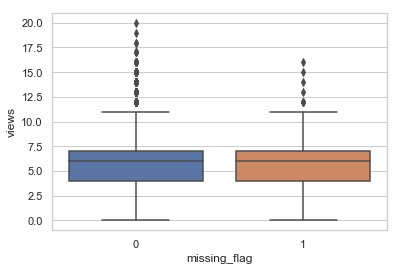

In [106]:
sns.boxplot(x='missing_flag', y='views', data=data)

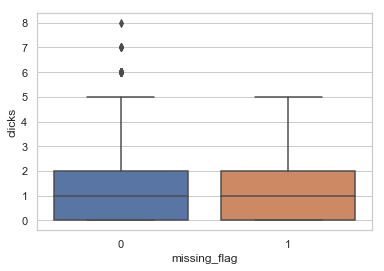

In [107]:
sns.boxplot(x='missing_flag', y='clicks', data=data)

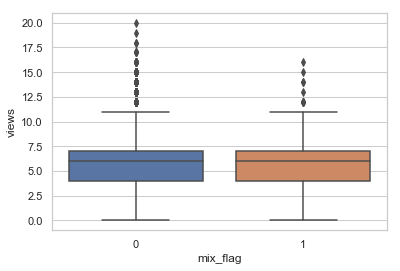

In [108]:
sns.boxplot(x='mix_flag', y='views', data=data)

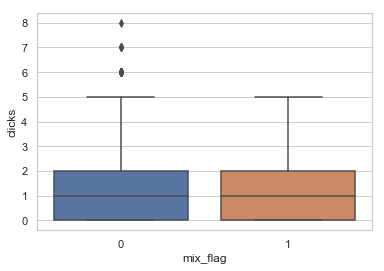

In [109]:
sns.boxplot(x='mix_flag', y='clicks', data=data)

## STEP 2  Before Experiment.

### 5. Split data into before experiment & after experiment 

**5.1 For simplicity , throw away problmatic records**

In [341]:
data=data[data.id_check == 0]
data.shape

(21131, 16)

**5.2 Sanity check before experiment**


**5.2.1 Split the data into two different dataset: before_exp, start_exp.**
    
    First 3 days are before experiment, after 3 days experiment starts.

In [342]:
data['date']=pd.to_datetime(data.date)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [343]:
data_before=data[data.date<data.date.min()+dt.timedelta(days=3)]

In [344]:
data_after=data[data.date>=data.date.min()+dt.timedelta(days=3)]

In [345]:
print (data_before.shape, data_after.shape)

(4487, 16) (16644, 16)


**5.2.2 compare aggregated CTR between test/control before experiment start**

Question: What is the results ? Are there any difference between test/control before expeirment start?

Tips: Use Chi square test from stats package for CTR test

In [346]:
data_before.groupby('groups').clicks.sum()

groups
control      2359
treatment    2367
Name: clicks, dtype: int64

In [ ]:
def ctr_test(data):
    v1,v2=data.groupby('groups').views.sum()
    c1,c2=data.groupby('groups').clicks.sum()
    ctr=np.array([[v1,c1], [v2,c2]])
    return stats.chi2_contingency(ctr)

def ctr_test2(data):
    v1,v2=data.groupby('groups').views.sum()
    c1,c2=data.groupby('groups').clicks.sum()
    ctr=pd.DataFrame([[v1,c1], [v2,c2]])
    ctr.columns=['Total', 'Converted']
    return ssp.proportions_ztest(count=ctr.Converted, nobs=ctr.Total, alternative='two-sided')

In [352]:
ctr_test(data_before)

(0.0016228705329904823,
 0.9678660181348819,
 1,
 array([[11898.23510247,  2360.76489753],
        [11920.76489753,  2365.23510247]]))

In [353]:
ctr_test2(data_before)

(-0.06872804167929282, 0.9452060969410443)

**5.2.3 Try to do this with device. (You can start with some visulization)**

## Step 3 Experiment #

### 1. Check if the CTR is significant between control & treatment groups. What's your results?  What do you think ?

In [354]:
print (ctr_test(data_after))

(2.0442300725546674, 0.15278426495947445, 1, array([[49093.05464968, 10019.94535032],
       [49563.94535032, 10116.05464968]]))


In [355]:
print (ctr_test2(data_after))

(-1.7681001532523846, 0.07704416184171753)


### 2. Break it down by device and check again.  What is your finding? What should you do at this point? 

In [356]:
for col in data_after.device.unique():
    data=data_after[data_after.device==col]
    print (col, ctr_test2(data))

Ios (-3.58927966357975, 0.00033159296273061915)
Other (-0.6381762010383913, 0.5233589874275538)
Web (-0.7200834546061613, 0.47147361389087306)
Android (0.8445144948193335, 0.398381967088125)


In [358]:
for col in data_after.device.unique():
    data=data_after[data_after.device==col]
    print (col, ctr_test(data)[1])

Ios 0.004063168009526296
Other 0.614386753844246
Web 0.567013192304382
Android 0.500865578366753


### 3. Check reveune

**3.1 Graph the hisgram of revenue. what is your finding?**

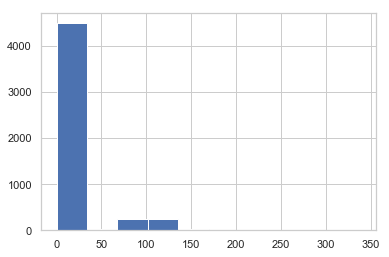

In [134]:
data.revenue.hist()

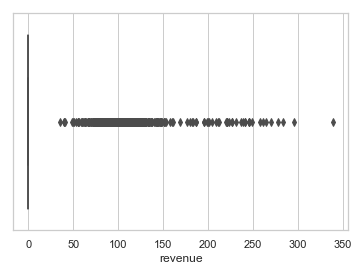

In [135]:
sns.boxplot(data.revenue)

In [136]:
data[data.revenue==0].shape[0]/data.shape[0]

0.8822720125786163

**3.2. The data is highly skewed with majority of the value being 0.  Now plot with only revune is bigger than 0.  What is your finding?**

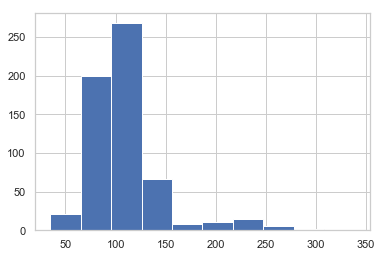

In [137]:
data_wr=data[data.revenue>0]
data_wr.revenue.hist()

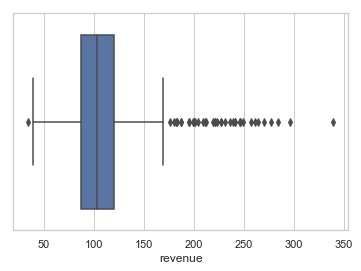

In [138]:
sns.boxplot(data_wr.revenue)

**3.3 There are many outliers. Let's remove them by capping at the 99% percentile**

In [359]:
data_c=data_wr[data_wr.revenue<data_wr.revenue.quantile(0.99)]

3.3.1 Plot the histgrom after removing the outliers.

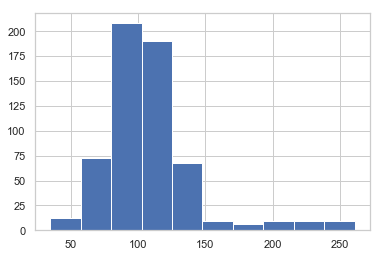

In [142]:
data_c.revenue.hist()

3.3.2 Boxplot of the revenue after removing the outliers.

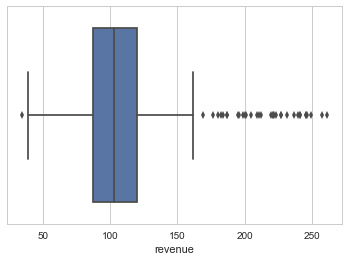

In [280]:
sns.boxplot(data_c.revenue)

**3.4 Calculate the mean and variance**

In [144]:
Est_mean=data_c.revenue.mean()

In [145]:
Est_var=data_c.revenue.var()/data_c.shape[0]

In [146]:
print (Est_mean, Est_var)

108.11315771573044 1.9804540681170475


**3.5 Do a bootstrip sampling and calculate the mean and variance.**

In [148]:
l = data_c.revenue
ll = np.random.choice(l, size=l.shape, replace=False)

In [153]:
Bt_mean=np.mean(ll)
Bt_var=np.var(ll)/len(ll)

In [155]:
print (Bt_mean, Bt_var)

108.1131577157304 1.9771143479347244


**3.6 Use t-test to compare revenue between control and treatment group. What is your finding?**

      Tips: You can use stats.ttest_ind(x1, x2)

In [360]:
bound=data.revenue.quantile(0.9)

data_before['revenue_win'] = np.where(data_before.revenue>bound, bound, data_before.revenue)
data_after['revenue_win']= np.where(data_after.revenue>bound, bound, data_after.revenue)

In [361]:
x1=data_after[data_after.groups=='control'].revenue_win
x2=data_after[data_after.groups=='treatment'].revenue_win

In [362]:
stats.ttest_ind(x1,x2)

Ttest_indResult(statistic=1.2301708918994756, pvalue=0.2186505062596382)

**3.7. Diff-in-diff T-test**

    For each user, conlculte the total revenue before and after the experment starts, then conculte the difference.
    Use ttest to check if there's any difference. what is your finding?

In [363]:
before=pd.DataFrame(data_before.groupby(['userid', 'country', 'device', 'groups']).revenue_win.sum())

In [364]:
after=pd.DataFrame(data_after.groupby(['userid', 'country', 'device', 'groups']).revenue_win.sum())

In [372]:
print (before.shape, after.shape)

(3661, 1) (6900, 1)


In [365]:
before.head()

,,,,revenue_win
userid,country,device,groups,
1002.0,US,Android,treatment,80.728252
1003.0,CA,Other,control,0.000000
1008.0,US,Web,control,0.000000
1009.0,US,Web,control,0.000000
1011.0,CA,Web,control,0.000000


In [377]:
diff=pd.merge(before, after, left_index=True, right_index=True, how='outer')

In [379]:
diff['diff_r']=diff.revenue_win_x-diff.revenue_win_y
diff.reset_index(inplace=True)

In [380]:
x1=diff[diff.groups=='control'].diff_r
x2=diff[diff.groups=='treatment'].diff_r

In [381]:
stats.ttest_ind(x1,x2)

Ttest_indResult(statistic=nan, pvalue=nan)

**3.8 Use regression to check the differnce**

In [382]:
diff.head()

,userid,country,device,groups,revenue_win_x,revenue_win_y,diff_r
0,1000.0,US,Android,control,NaN,161.456504,NaN
1,1001.0,CA,Other,treatment,NaN,0.000000,NaN
2,1002.0,US,Android,treatment,80.728252,NaN,NaN
3,1003.0,CA,Other,control,0.000000,0.000000,0.0
4,1005.0,US,Android,treatment,NaN,161.456504,NaN


In [383]:
diff.fillna(0, inplace=True)

In [384]:
X=pd.get_dummies(diff[['groups', 'country', 'device', 'revenue_win_x']])
y=diff.revenue_win_y

In [385]:
#if one column is completely zero. It should be removed otherwise the GLM model will fail.

In [386]:
glm_binom = sm.formula.glm("revenue_win_y ~ groups + country + device + revenue_win_x", data=diff)
res = glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          revenue_win_y   No. Observations:                 7219
Model:                            GLM   Df Residuals:                     7210
Model Family:                Gaussian   Df Model:                            8
Link Function:               identity   Scale:              1633.1562443156845
Method:                          IRLS   Log-Likelihood:                -36943.
Date:                Sun, 10 Mar 2019   Deviance:                   1.1775e+07
Time:                        16:30:57   Pearson chi2:                 1.18e+07
No. Iterations:                     2                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              22.2316      1.387     16.032      0.000      19.514      24.949
groups[T.treatment]    -1

### 4 Cohort analysis

**4.1 For change, over time change, 14 dates, 4th day start, line chart with CI by date**

  Instruction: Create a dataframe with the following columns: date, CTR_treatment, CTR_control, Pvalue. Check how the   -value changes over time. How do you interprect it ?  

In [387]:
d4id=data[data.date=='2017-05-11'].userid.unique()

In [388]:
d4enroll=data[data.userid.isin(d4id)]

In [389]:
print (data.shape, d4enroll.shape)

(5088, 16) (1480, 16)


In [390]:
cor_df=pd.DataFrame(columns=['date',  'pvalue'])

for col in d4enroll.date.unique():
    cor_df=cor_df.append({'date': col,  'pvalue':ctr_test2(d4enroll[d4enroll.date==col])[1] }, ignore_index=True)

In [391]:
cor_df.sort_values(by='date')

,date,pvalue
2,2017-05-11,0.709917
0,2017-05-12,0.159043
1,2017-05-13,0.919217
5,2017-05-14,0.302930
10,2017-05-15,0.674252
9,2017-05-16,0.269552
7,2017-05-17,0.731008
6,2017-05-18,0.204323
3,2017-05-19,0.344456
8,2017-05-20,0.772384
